In [16]:
#importing the required modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import anderson, wilcoxon, ttest_ind

In [2]:
home_dir = os.path.join(r'Z:/balint/numt/Michael/data/')

In [3]:
numt_array = pd.read_csv(home_dir + r'numt_master_array_with_1000_flanking.csv')
numt_array = numt_array.drop(0)
numt_array

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,g_up_flanking,g_down_flanking,"mt_up_flanking (if strand is negative, the coordinates are corrected)","mt_down_flanking (if strand is negative, the coordinates are corrected)"
1,3398,0.000000e+00,0.000000e+00,1,114731432,6976,4680,4681,+,+,194850757,taGTAAAATTATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,TAGTAAAACCATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,GGGCAATTCAATATTCATAAATCAATAAACATCATAAATCACACCA...,TATATATATTTATATATATATGTATATATGTACATATATATAACTA...,GCTTTTAACAGACCGAAACTTAAATACAACCTTCTTTGATCCTGCA...,AACTGCTAATTCATGCTCCCATGTCTAACCCCATGGCTTTCTCAAC...
2,3120,0.000000e+00,0.000000e+00,GL019308,67160,883,4892,4945,+,+,88228,CAAGGCCATGAAGCATGCACACACTGCCCATCGCTCTCCTCAAACA...,CAAGGCCATGAAGCACGCACACACCGCCCGTCACCCTCCTCAAGTG...,AAAGCAATTAAATTTTTAACAAAATTTTTAGGCTTAATGAACTAGA...,ATGAAGGGGCAAAGAGTAATTTTACAGTCGAGAGGGCTAGCAGTCA...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,TAGGGGCTATTAACTTTATTACAACTATTATTAATATGAAAGCCCC...
3,1888,0.000000e+00,0.000000e+00,GL019308,62527,12805,3439,3462,+,+,88228,AATTATTCATAGCCTCAATGATGAACAAGACATCCAAAAAACAGGA...,AATTATTCACAGCCTcaaTGATGAACAGGATATCCGAAAGATAGGC...,TTCTAATTACAGCACTCTACTCCCTCTACATTTTATCAACCAAAGA...,ACGTATACATGAGTTGTTCTTACATAATTGAATATACCTGCAATGC...,TTATTATTTTAGTCCTCCCTATTGTGGCCTCTTTCACTAACATTTT...,GTACACCCGTACGCACGCACGTACACCCGTACGCACGCACGTACAC...
4,1824,0.000000e+00,0.000000e+00,AAGW02081594,14016,6061,3040,3073,+,+,24576,TTCTTTGGACACCCTGAGGTATATATTCTTATCCTTCCAGGATTCG...,TTTTTCGGGCACCCCGAAGTATATATTCTTATTCTTCCAGGATTTG...,TGCCACACCTCCCATGGGATAAAGAGGAAAGGGTCTGGTGCCATGC...,TGAAATAGCTATCACTATTCAGGTATGCCACTATTCTTCTAGGCAT...,CATCTCCTGAGTGCAAACCAGGTGCTTTAATTAAGCTAAATCCTCC...,ATTCTCCTAGGTATCTATTTTACCCTACTTCAAGCATCGGAGTATT...
5,1344,0.000000e+00,0.000000e+00,AAGW02081594,20039,11341,2339,2362,+,+,24576,ATAGCATCCTTTTCATGATCTAATCTCACTATTATTTTAATAGGGA...,ATGGCCTCCTTCTCATGATCTAACCTCACAATCATCCTGATAGGGA...,TCTTTCTCATTGTCCACTGTGCCTGTCAAAAAATAAAAAGAAAAAG...,GGCTGGTGCTGCAGCTCAGTAGGCTAATCTTCCACCTAGCGGCGTG...,CCTAAACTTCTCAACCACATTTTTTTCAGATGCCTTATCCACTCCT...,ATCCTACCTCGTCCCCTTCAAAAACCACCCAATCCCCCATATTTTT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,80,2.800000e-21,5.000000e-25,GL019047,205885,9539,243,247,+,-,247428,GATCAGTTTTCAAAGTGCTTTTATGGTACTGA----AGTACAATAG...,GATCAGTTTTCGAAGTGTTTAAGTGGAACTATTTCGAGGACAATAG...,TTAATTAGATGGCTAAGATTGTGTGTTGAATAAATAGAGTAGTAAT...,AGTTAGGGAGGAGTTGTTAATTTTGTCTGTTATGCATAGAGCTCAT...,CACCTACTATGTAGTAGCTCACTTCCACTATGTCCTATCTATGGGG...,CCTATCTATGATTTAGACTCGCTATGAAGCTAAACAGCGCTAGCCT...
149,77,7.500000e-20,1.300000e-23,AAGW02081404,17858,882,136,140,+,-,27691,GTACGTgcgtacgtgcgtacgggtgtacgggtgtacgggtgtacgg...,gtgcgtacgggtgtacgtgcgtgcgtacgggtgtacgtgcgtgcgt...,TTGTAAAGGTGCGTTTTAAATTTCAAAATTTAGGTGCCCTGAGCTG...,GTACGTGCGTACGTGCGTACGGGTGTACGGGTGTACGTGCGTGCGT...,TGGACAAGTAGCATCTGTCCTCTACTTCACCACCATCCTTATTCTT...,GCACGTACACCCGTACGCACGCACGTACACCCGTACGCACGCACGT...
150,75,6.700000e-19,1.200000e-22,GL019311,22172,5436,218,228,+,-,80506,ATAATTAGTCAAGTTATAGAGGAAGAAAATAG----ATTAGTTTTA...,ATAATTGATACAGCTACAGAGGTGGAGAATAAGTTAATTACTTTTA...,CCCGCGGGTCGTGCGCCAGGTGAGGGCGCAGGTTCGGCCCGGGCCC...,GTTTAAAATGTATGTGCCCTGGGGCTGGCGCGCTGGTGCAGTAGGT...,TCTTATCATTATTACACGATGAGGTAATCAAACAGAGCGACTCAAC...,TATTTTAGTCCTCCCTATTGTGGCCTCTTTCACTAACATTTTTAAT...
151,74,2.000000e-18,3.600000e-22,21,11379492,15954,321,320,+,-,15578276,CTAATTCATTACGTAAAAAGATAAAAGGGTTAATCTTTGCTTTTTA...,CTAATTCATTATGCAAAAGG-TAAGAGAAGTAATCTCTGCTTTTTT...,ATGACAGCCACAGTGAGCACTAAAGTTCTGTTGCACAGAATTGTTT...,GCATGTTTAAGTTTATGATTTAAATTTAAATTAGCTTAGGTTGGCT...,TGGACTAGAAATCTCTAGTCTAGGCTAAAGTTAATGTAGCTTAACA...,CTAGAAAATCCTTAGCAAAAAGAATTTTAGTTAAGAACCCCGAAAC...


In [6]:
g_ids = numt_array['g_id']
g_ids

1                 1
2          GL019308
3          GL019308
4      AAGW02081594
5      AAGW02081594
           ...     
148        GL019047
149    AAGW02081404
150        GL019311
151              21
152        GL018744
Name: g_id, Length: 152, dtype: object

In [8]:
chromosome_length = numt_array['g_size']
chromosome_length.index = g_ids
chromosome_length

g_id
1               194850757
GL019308            88228
GL019308            88228
AAGW02081594        24576
AAGW02081594        24576
                  ...    
GL019047           247428
AAGW02081404        27691
GL019311            80506
21               15578276
GL018744          2220855
Name: g_size, Length: 152, dtype: int64

In [9]:
#the start positions of the upstream flankings
u_flanking_start = numt_array['g_start'].apply(lambda start : start - 5000)
u_flanking_start[u_flanking_start < 0] = 1
u_flanking_start.index = g_ids
u_flanking_start

g_id
1               114726432
GL019308            62160
GL019308            57527
AAGW02081594         9016
AAGW02081594        15039
                  ...    
GL019047           200885
AAGW02081404        12858
GL019311            17172
21               11374492
GL018744           668556
Name: g_start, Length: 152, dtype: int64

In [10]:
#the end positions of the upstream flankings (which are the genomic_starts of the numts)
u_flanking_end = numt_array['g_start']
u_flanking_end.index = g_ids
u_flanking_end

g_id
1               114731432
GL019308            67160
GL019308            62527
AAGW02081594        14016
AAGW02081594        20039
                  ...    
GL019047           205885
AAGW02081404        17858
GL019311            22172
21               11379492
GL018744           673556
Name: g_start, Length: 152, dtype: int64

In [11]:
#start position of downstream_flanking (which is equal to the ends of the numts)
numt_array['g_length'].index = g_ids
d_flanking_start = numt_array['g_start'] + numt_array['g_length']
d_flanking_start.index = g_ids
d_flanking_start

g_id
1               114736112
GL019308            72052
GL019308            65966
AAGW02081594        17056
AAGW02081594        22378
                  ...    
GL019047           206128
AAGW02081404        17994
GL019311            22390
21               11379813
GL018744           673875
Length: 152, dtype: int64

In [12]:
#end position of downstream_flanking
numt_ends = numt_array['g_start'] + numt_array['g_length']
d_flanking_end = numt_ends.apply(lambda end : end + 5000)
d_flanking_end

g_id
1               114741112
GL019308            77052
GL019308            70966
AAGW02081594        22056
AAGW02081594        27378
                  ...    
GL019047           211128
AAGW02081404        22994
GL019311            27390
21               11384813
GL018744           678875
Length: 152, dtype: int64

In [13]:
#get the regions
indices = np.arange(0,len(u_flanking_start),1)
upstream_flankings = pd.Series(index = indices)
downstream_flankings = pd.Series(index = indices)
for index, u_start in enumerate(u_flanking_start):
    upstream_rm_item = (str(g_ids[index + 1]) + ':' +str(u_start) + '-' + str(u_flanking_end[index]))
    upstream_flankings[index] = upstream_rm_item
    downstream_rm_item = ''
    if chromosome_length[index] < d_flanking_end[index]:
        downstream_rm_item = (str(g_ids[index + 1]) + ':' +str(d_flanking_start[index]) +
                          '-' + str(chromosome_length[index]))
    else:
        downstream_rm_item = (str(g_ids[index + 1]) + ':' +str(d_flanking_start[index]) +
                              '-' + str(d_flanking_end[index]))
    downstream_flankings[index] = downstream_rm_item

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [14]:
upstream_flankings

0         1:114726432-114731432
1          GL019308:62160-67160
2          GL019308:57527-62527
3       AAGW02081594:9016-14016
4      AAGW02081594:15039-20039
                 ...           
147      GL019047:200885-205885
148    AAGW02081404:12858-17858
149        GL019311:17172-22172
150        21:11374492-11379492
151      GL018744:668556-673556
Length: 152, dtype: object

In [15]:
downstream_flankings

0         1:114736112-114741112
1          GL019308:72052-77052
2          GL019308:65966-70966
3      AAGW02081594:17056-22056
4      AAGW02081594:22378-24576
                 ...           
147      GL019047:206128-211128
148    AAGW02081404:17994-22994
149        GL019311:22390-27390
150        21:11379813-11384813
151      GL018744:673875-678875
Length: 152, dtype: object

In [16]:
#writing output
with open(home_dir + 'upstream_flankings.bed','w') as up_out, open(home_dir + 'downstream_flankings.bed','w') as down_out:
    upstream_flankings.apply(lambda line : up_out.write(line + '\n'))
    downstream_flankings.apply(lambda line : down_out.write(line + '\n'))

In [13]:
numtless_sequences = numtless_ids.apply(get_numtless_sequences)
numtless_sequences

AAGW02081404.fasta
MT.fasta


1               AGGACCGCACAACCTTGCAGCTCAGCGACTCGTGGGGTCACACACA...
11              CTCACACACCCACGCGGCCTCACACACCCACGAGACCTCACACACC...
12              CTGAGTTCCTGGCTTCTGGCTTTGGCCTGGCTCAACCCCAGCTGCA...
13              TCATAATCCTAACCATAACCAAGGATTCAACCATAAATTTAAGACT...
14              AAATGAAGTCAGATATGGTAATCGATACTGAACTGAGGCACGGATT...
15              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
16              CAGAATGAGATTTCTGCACTACAGACAAGAGTCTTTTGTCGTGCCT...
17              GGTGTGGTATATGTGGTGTGTATGGTATGTGTGTGGTACTGTATGG...
18              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
19              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
2               GAGTTATAAAAGAGAAGGAGAGGCAGAGAGAGAGAGAGCAGTATGA...
20              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
21              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3               AAGCAGGCCAGTCCACTGTGTCACTTACAGACACAGCTGACACTGA...
4               AACCAACGAGCTATGCACTTATGATATATGTGCTTTTTTTTTTTTT...
7         

In [16]:
numtless_sequences = numtless_sequences.drop(labels = ['AAGW02081404', 'MT'])

In [17]:
numtless_sequences

1               AGGACCGCACAACCTTGCAGCTCAGCGACTCGTGGGGTCACACACA...
11              CTCACACACCCACGCGGCCTCACACACCCACGAGACCTCACACACC...
12              CTGAGTTCCTGGCTTCTGGCTTTGGCCTGGCTCAACCCCAGCTGCA...
13              TCATAATCCTAACCATAACCAAGGATTCAACCATAAATTTAAGACT...
14              AAATGAAGTCAGATATGGTAATCGATACTGAACTGAGGCACGGATT...
15              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
16              CAGAATGAGATTTCTGCACTACAGACAAGAGTCTTTTGTCGTGCCT...
17              GGTGTGGTATATGTGGTGTGTATGGTATGTGTGTGGTACTGTATGG...
18              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
19              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
2               GAGTTATAAAAGAGAAGGAGAGGCAGAGAGAGAGAGAGCAGTATGA...
20              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
21              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3               AAGCAGGCCAGTCCACTGTGTCACTTACAGACACAGCTGACACTGA...
4               AACCAACGAGCTATGCACTTATGATATATGTGCTTTTTTTTTTTTT...
7         

In [32]:
identifiers = pd.Series(numtless_sequences.index.values)
numt_count = identifiers.apply(lambda g_id : list(numt_array['g_id']).count(g_id))
numt_count.index = numtless_sequences.index.values
numt_count

1               9
11              1
12              3
13              2
14              1
15              5
16              1
17              3
18              4
19              1
2               2
20              2
21              1
3               1
4               8
7               3
9               4
AAGW02079688    3
AAGW02081594    4
AAGW02083714    1
GL018700        1
GL018705        1
GL018706        1
GL018741        5
GL018744        1
GL018748        3
GL018786        1
GL018817        4
GL018826        8
GL018862        2
GL018925        2
GL018992        1
GL019010        3
GL019047        3
GL019056        1
GL019086        1
GL019149        2
GL019235        1
GL019271        1
GL019308        5
GL019311        2
GL019326        6
GL019383        2
GL019465        5
GL019525        1
dtype: int64

In [35]:
lengths = numtless_sequences.apply(lambda sequence : len(sequence))
lengths

1               194841325
11               87553407
12              155354606
13              143360353
14              163896177
15              109051050
16               84478782
17               85007110
18               69798111
19               57279035
2               174331712
20               33190240
21               15577954
3               155690876
4                91385928
7               173683288
9               116249691
AAGW02079688        72642
AAGW02081594        16966
AAGW02083714         5154
GL018700         13460905
GL018705          6123776
GL018706          5787096
GL018741          2346725
GL018744          2220535
GL018748          2145859
GL018786          1165074
GL018817           943909
GL018826           917140
GL018862           659056
GL018925           585214
GL018992           287663
GL019010           276843
GL019047           246181
GL019056           198795
GL019086           290499
GL019149           135766
GL019235           104204
GL019271    

In [95]:
#function for sampling genome
def sampling_genome(g_id):
    global sum_ranges
    number = numt_count[g_id]
    sample_ranges = []
    for i in range(0,number,1):
        np.random.seed(i + 5)
        length = lengths[g_id]
        sequence = numtless_sequences[g_id]
        range_max = length - 5000
        range_start = np.random.randint(0, range_max)
        range_end = range_start + 5000
        sample_ranges.append(g_id + ':' + str(range_start) + '-' + str(range_end))
    sum_ranges += sample_ranges
    return sample_ranges

In [97]:
#get the sample ranges
sum_ranges = []
identifiers.index = identifiers
samples = identifiers.apply(sampling_genome)
sum_ranges

['1:148147043-148152043',
 '1:76708746-76713746',
 '1:59306159-59311159',
 '1:47736148-47741148',
 '1:44556670-44561670',
 '1:91571465-91576465',
 '1:24940223-24945223',
 '1:125253451-125258451',
 '1:118980946-118985946',
 '11:13929315-13934315',
 '12:148147043-148152043',
 '12:76708746-76713746',
 '12:59306159-59311159',
 '13:80864957-80869957',
 '13:76708746-76713746',
 '14:148147043-148152043',
 '15:13929315-13934315',
 '15:76708746-76713746',
 '15:59306159-59311159',
 '15:47736148-47741148',
 '15:44556670-44561670',
 '16:13929315-13934315',
 '17:13929315-13934315',
 '17:76708746-76713746',
 '17:59306159-59311159',
 '18:13929315-13934315',
 '18:42846921-42851921',
 '18:59306159-59311159',
 '18:47736148-47741148',
 '19:13929315-13934315',
 '2:148147043-148152043',
 '2:76708746-76713746',
 '20:13929315-13934315',
 '20:9599882-9604882',
 '21:13929315-13934315',
 '3:148147043-148152043',
 '4:13929315-13934315',
 '4:76708746-76713746',
 '4:59306159-59311159',
 '4:47736148-47741148',
 '4:

In [98]:
#writing output file
with open(home_dir + 'repeat_samples.bed', 'w') as outfile:
    pd.Series(sum_ranges).apply(lambda sample_range : outfile.write(sample_range + '\n'))

In [4]:
#read upstream repeats
upstream_repeats = pd.read_csv(home_dir + r'repeats/upstream_flanking_repeats', sep = '\t')
upstream_repeats = upstream_repeats.set_index('genoName')
upstream_repeats.head()

,#bin,swScore,milliDiv,milliDel,milliIns,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
genoName,,,,,,,,,,,,,,,,
chr1,1460,275,262,119,0,114727071,114727155,-80123602,+,MLT1A,LTR,ERVL-MaLR,25,118,-256,1
chr1,1460,1141,268,45,3,114727222,114727559,-80123198,-,MLT-int,LTR,ERVL-MaLR,-12,1723,1373,1
chr1,1460,35,63,0,0,114728330,114728393,-80122364,+,AT_rich,Low_complexity,Low_complexity,1,63,0,1
chr1,1460,22,0,0,0,114728439,114728461,-80122296,+,AT_rich,Low_complexity,Low_complexity,1,22,0,1
chr1,1460,957,226,61,19,114728509,114728771,-80121986,-,CSINE1,SINE,SINE,-33,307,35,1


In [5]:
#read downstream repeats
downstream_repeats = pd.read_csv(home_dir + r'repeats/downstream_flanking_repeats', sep = '\t')
downstream_repeats = downstream_repeats.set_index('genoName')
downstream_repeats.head()

,#bin,swScore,milliDiv,milliDel,milliIns,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
genoName,,,,,,,,,,,,,,,,
chr1,1460,416,122,0,12,114736112,114736195,-80114562,+,(TA)n,Simple_repeat,Simple_repeat,1,82,0,1
chr1,1460,1560,213,42,0,114736195,114736552,-80114205,+,L1M2,LINE,L1,4808,5179,-964,1
chr1,1460,283,283,35,17,114736561,114736676,-80114081,+,L1M5,LINE,L1,5526,5642,-600,1
chr1,1460,515,280,5,107,114736709,114736801,-80113956,+,CSINE2,SINE,SINE,5,80,-264,1
chr1,1460,1698,114,99,19,114736801,114737115,-80113642,-,CSINE3A,SINE,SINE,-11,339,1,1


In [6]:
#read sample repeats
sample_repeats = pd.read_csv(home_dir + r'repeats/sample_repeats', sep = '\t')
sample_repeats = sample_repeats.set_index('genoName')
sample_repeats.head()

,#bin,swScore,milliDiv,milliDel,milliIns,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
genoName,,,,,,,,,,,,,,,,
chr1,1170,1094,181,8,96,76710292,76710543,-118140214,+,CSINE2,SINE,SINE,116,344,0,1
chr1,1170,666,297,105,47,76710539,76711053,-118139704,+,MLT1E2,LTR,ERVL-MaLR,73,627,0,1
chr1,1170,6358,220,58,24,76712233,76712345,-118138412,+,L1M2,LINE,L1,2379,2489,-3654,1
chr1,1170,2513,57,48,6,76712345,76712679,-118138078,+,CSINE3A,SINE,SINE,1,348,-2,1
chr1,1170,6358,220,58,24,76712679,76713312,-118137445,+,L1M2,LINE,L1,2490,3147,-2996,1


In [7]:
#get common repetitions in all three dataset (upstream, downstream, genome)
common_reps = pd.Series(list(set(upstream_repeats['repName'].unique()) &
                             set(downstream_repeats['repName'].unique()) &
                             set(sample_repeats['repName'].unique())))

In [8]:
def get_repeatnumber(chromosome, repname):
    up_sub = upstream_repeats.loc[chromosome]
    down_sub = downstream_repeats.loc[chromosome]
    sample_sub = sample_repeats.loc[chromosome]
    return [list(up_sub['repName']).count(repname),
           list(down_sub['repName']).count(repname),
           list(sample_sub['repName']).count(repname)]

In [9]:
#empty series for the repetitions
repnums = pd.Series(index = common_reps, dtype = str)

In [10]:
for repname in common_reps:
    chromosomes = pd.Series(np.unique(sample_repeats.index.values))
    samples = chromosomes.apply(get_repeatnumber, args = (repname,))
    up_reps = []
    samples.apply(lambda sample : up_reps.append(sample[0]))
    down_reps = []
    samples.apply(lambda sample : down_reps.append(sample[1]))
    sample_reps = []
    samples.apply(lambda sample : sample_reps.append(sample[2]))
    repnums[repname] = [up_reps, down_reps, sample_reps]

In [11]:
#function for the statistical analysis of repetitions
#upstream_repetitions = nested_list[0]
#downstream_repetitions = nested_list[1]
#sample_repetitions = nested_list[2]
def statistical_analysis(nested_list, which):
    sample1 = nested_list[which[0]]
    sample2 = nested_list[which[1]]
    norm1 = anderson(sample1)
    norm2 = anderson(sample2)
    stat1 = norm1[0]
    stat2 = norm2[0]
    critical_value1 = norm1[1][2]
    critical_value2 = norm2[1][2]
    if (stat1 > critical_value1) or (stat2 > critical_value2):
        try:
            significance = wilcoxon(sample1, sample2)[1]
            return significance
        except ValueError:
            pass
    else:
        try:
            significance = ttest_ind(sample1, sample2)[1]
            return significance
        except ValueError:
            pass

In [12]:
#statistics of upstream and downstream repetitions
ud_stat = repnums.apply(statistical_analysis, args = ([0,1],))
ud_stat[ud_stat < 0.05]

C:\Users\pytho\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


MIRb     0.002682
(TG)n    0.039008
dtype: float64

In [13]:
##just to check what is the class and family of 'MIRb'
upstream_repeats.loc[upstream_repeats['repName'] == 'MIRb']

,#bin,swScore,milliDiv,milliDel,milliIns,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
genoName,,,,,,,,,,,,,,,,
chrUn0634,585,186,289,22,0,58945,58990,-29238,-,MIRb,SINE,MIR,-23,245,200,4
chrUn1218,585,186,289,22,0,10976,11021,-13555,-,MIRb,SINE,MIR,-23,245,200,4
chrUn0658,585,186,289,22,0,54933,54978,-26744,-,MIRb,SINE,MIR,-23,245,200,4
chrUn0634,585,186,289,22,0,58945,58990,-29238,-,MIRb,SINE,MIR,-23,245,200,4
chrUn0658,585,186,289,22,0,54933,54978,-26744,-,MIRb,SINE,MIR,-23,245,200,4
chr9,912,379,293,68,8,42950966,42951170,-73300737,+,MIRb,SINE,MIR,23,251,-17,3
chrUn0088,586,255,364,53,8,214523,214656,-950629,+,MIRb,SINE,MIR,40,178,-90,3
chr13,700,229,330,40,0,15103333,15103433,-128257399,-,MIRb,SINE,MIR,-156,112,9,7
chr7,1550,284,320,96,10,126584170,126584274,-47100185,-,MIRb,SINE,MIR,-40,228,116,2


In [14]:
#statistics of upstream and sample repetitions
us_stat = repnums.apply(statistical_analysis, args = ([0,2],))
us_stat[us_stat < 0.05]

C:\Users\pytho\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


MIR     0.007536
MIR3    0.006656
dtype: float64

In [15]:
#statistics of downstream and sample repetitions
ds_stat = repnums.apply(statistical_analysis, args = ([1,2],))
ds_stat[ds_stat < 0.05]

C:\Users\pytho\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


(TG)n    0.048140
L1M5     0.045737
MIR3     0.039360
dtype: float64

In [141]:
#just to check what is the class and family of 'L1M5'
downstream_repeats.loc[downstream_repeats['repName'] == 'L1M5']

,#bin,swScore,milliDiv,milliDel,milliIns,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
genoName,,,,,,,,,,,,,,,,
chr1,1460,283,283,35,17,114736561,114736676,-80114081,+,L1M5,LINE,L1,5526,5642,-600,1
chrUn0634,585,246,192,122,49,76663,76745,-11483,+,L1M5,LINE,L1,5734,5821,-343,4


In [35]:
df = pd.DataFrame([ud_stat, us_stat, ds_stat])
df.index = (['up_down','up_sample','down_sample'])
df

,L1MEe,LTR27_OC,GC_rich,L1MB4,L2b,L1ME3A,MIRb,(TAAA)n,tRNA-Gln-CAA_,MIR,...,L1M4c,MIR3,L1M2,ERVNOC_LTR,L1MEg,L1B_Oc,L1MB7,MER5A1,L2,LTR22_OC
up_down,0.285049,0.157299,0.380455,0.654721,0.095581,0.130570,0.002682,0.144127,0.058782,0.540544,...,0.179712,0.317311,0.206130,0.437353,1.000000,0.256839,0.592980,0.654721,0.798074,0.317311
up_sample,0.179712,0.193646,0.414216,0.654721,0.058782,0.285049,0.164128,0.782528,0.317311,0.007536,...,1.000000,0.006656,0.071184,0.762184,0.157299,0.120645,0.285049,1.000000,0.680280,0.317311
down_sample,0.563703,1.000000,0.666632,1.000000,1.000000,1.000000,0.203339,0.207474,0.058782,0.083457,...,0.276303,0.039360,0.550256,0.596113,0.654721,0.300803,0.285049,0.654721,0.546121,NaN


No handles with labels found to put in legend.


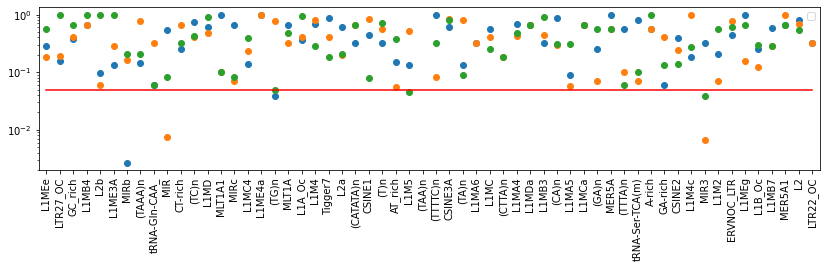

In [94]:
fig, axes = plt.subplots(1, 1, figsize = (14,3))
axes.scatter(x = df.columns.values, y = df.loc['up_down'])
axes.scatter(x = df.columns.values, y = df.loc['up_sample'])
axes.scatter(x = df.columns.values, y = df.loc['down_sample'])
axes.plot(df.columns.values, (len(df.columns.values) * [0.05]), 'r')
axes.legend()
plt.margins(x=0.01)
plt.xticks(rotation = 90)
plt.yscale('log')